# Analysis of changes in nightly lows at Rochester, NY over last 50 years

### Everyone is aware of global worming caused by the increased CO2 content and CH4 content in our atmosphere, the former being caused by the combustion of fossile fuels and the latter being caused by thawing of tundra and gas flares. It is also well known that the international community (i.e. 2015 Paris Agreement) strives to limit global warming by about 1.5 Celsius degrees (2.7 Fahrenheit degrees). Nevertheless, authorities say we may have reached this 2.7 fahrenheit degree increase.

### This project looks at the change in nightly lows in the last 64 years in Rochester, NY (ROC) to see how it has changed as compared to the 2.7 fahrenheit degree limit. Is the change in nightly lows greater? Why? Can this be all attributed to global warming? Or are other factors at play here such as the urban heat island effect?

### The data was imported from the National Centers for Environmental Information of NOAA (i.e. the National Weather Service)

### After downloading data to my local PC, I now read it in and inspect it. Notice that only the date and the minimum temperatures in Fahrenheit are read in

In [164]:
import pandas as pd
# Program to extract number
# of rows using Python
#import xlrd
 
# Give the location of the file
#loc = ("C:\Users\user\Downloads\rocmintemp1a.csv")
df = pd.read_csv('C:\\Users\\Matthew\\Desktop\\datasets\\Rocminds1a\\rocmaster1b.csv')
print(df.head())
print('ldlsl')


       STATION                                    NAME      DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/01/48   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/02/48   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/03/48   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/04/48   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US  01/05/48   NaN    29   

   TMIN  Unnamed: 6  
0    22         NaN  
1    24         NaN  
2    22         NaN  
3    23         NaN  
4    21         NaN  
ldlsl


### I now explore the read in data

In [165]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27088 entries, 0 to 27087
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STATION     27088 non-null  object 
 1   NAME        27088 non-null  object 
 2   DATE        27088 non-null  object 
 3   TAVG        5839 non-null   float64
 4   TMAX        27088 non-null  int64  
 5   TMIN        27088 non-null  int64  
 6   Unnamed: 6  1 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB
None


### do not that the date column is object type. This will have to be converted to datetime

In [166]:
print(df.shape)

(27088, 7)


In [167]:
print(df.describe())

              TAVG          TMAX          TMIN  Unnamed: 6
count  5839.000000  27088.000000  27088.000000         1.0
mean     49.515670     57.543783     39.360344         0.0
std      18.636754     20.574022     17.645540         NaN
min      -3.000000     -4.000000    -19.000000         0.0
25%      35.000000     40.000000     27.000000         0.0
50%      51.000000     59.000000     40.000000         0.0
75%      66.000000     76.000000     54.000000         0.0
max      85.000000    100.000000     78.000000         0.0


In [168]:
df2 = df
df2['DATE'] = pd.to_datetime(df['DATE'])
print(df2.shape)
#print(df2.head(90))

(27088, 7)


### Converting to datetime caused dates prior to 1969 (i.e. 1948 to 1968) to convert to 2048 to 2068, 
### the following code addresses this


In [169]:
date_separator = pd.to_datetime("20250101")
century = pd.DateOffset(years=100)
before_separator = df2['DATE'] > date_separator
df2.loc[before_separator , 'DATE'] = df2['DATE'] - century
print(df2.head())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  
0    22         NaN  
1    24         NaN  
2    22         NaN  
3    23         NaN  
4    21         NaN  


### new columns 'month' and 'year' are created from the 'DATE' column to store integer values to aid subsequent processing¶

In [170]:
df2['year'] = df2['DATE'].dt.year
df2['month'] = df2['DATE'].dt.month
print(df2.head())
print(df2.tail())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  year  month  
0    22         NaN  1948      1  
1    24         NaN  1948      1  
2    22         NaN  1948      1  
3    23         NaN  1948      1  
4    21         NaN  1948      1  
           STATION                                    NAME       DATE  TAVG  \
27083  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-24  19.0   
27084  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-25  20.0   
27085  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02

### The analysis of the data begins. First, I will see how the average of the daily mean changed over the 73 years to get an idea of the overall temp increase, and then I will plot the annual mean of the daily highs and daily lows to see which one had the greatest increase in temperature

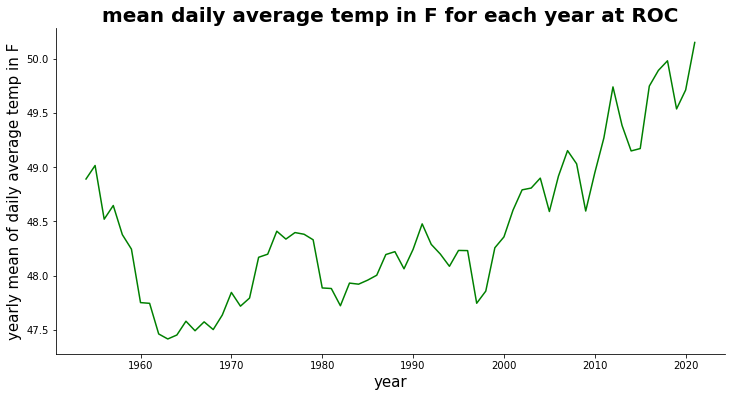

In [171]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1947) & (df2['year'] < 2022)]
dfext = (dffull.groupby(['year'])['TMAX'].mean() + dffull.groupby(['year'])['TMIN'].mean())/2.0
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='green')
ax.set_ylabel ('yearly mean of daily average temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily average temp in F for each year at ROC", size=20, weight='bold')
plt.show()

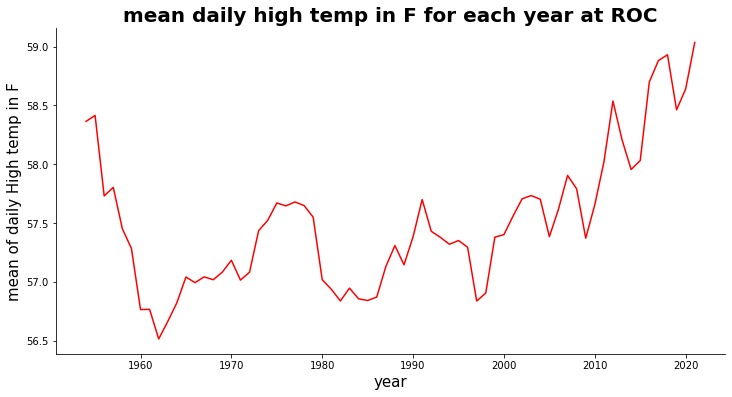

In [172]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMAX'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean(), c='red')
ax.set_ylabel ('mean of daily High temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily high temp in F for each year at ROC", size=20, weight='bold')
plt.show()

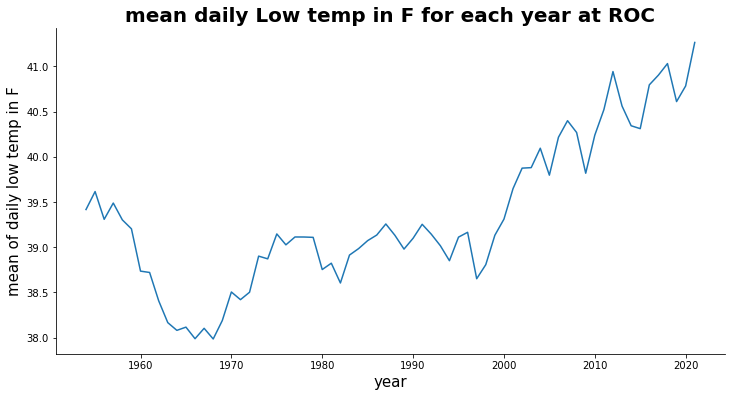

In [173]:
import matplotlib.pyplot as plt
import numpy as np
dffull = df2[(df2['year'] > 1945) & (df2['year'] < 2022)]
dfext = dffull.groupby(['year'])['TMIN'].mean()
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(dfext.index, dfext.rolling(7).mean())
ax.set_ylabel ('mean of daily low temp in F', size = 15)
ax.set_xlabel ('year', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("mean daily Low temp in F for each year at ROC", size=20, weight='bold')
plt.show()

### The above 3 curves are very similar and each seem to show a 1.5 F increase over the last 73 years, most of the increase occurring in the last 10 years of so

### Now I will explore whether extreme cold, extreme hot or certain month highs or lows contribte an outsized increase in temperature to this overall warming

In [174]:
df3 = df2[(df2['month'] > 11) | (df2['month'] < 4)]
print(df3.shape)

(9032, 9)


### Because December is of a different year than Jan and Feb,  I'll remedy this issue by adding a new column called 'season' to allow for December to be grouped with Jan and Feb of the next calendar year

In [175]:
pd.options.mode.chained_assignment = None  # default='warn'
df3['season'] = df3.apply(lambda x: f"{x['year']-1}/{x['year']}" if x['month'] < 4 else f"{x['year']}/{x['year']+1}", axis=1)
print(df3.head())
print(df3.tail())

       STATION                                    NAME       DATE  TAVG  TMAX  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-01   NaN    28   
1  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-02   NaN    28   
2  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-03   NaN    30   
3  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-04   NaN    29   
4  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 1948-01-05   NaN    29   

   TMIN  Unnamed: 6  year  month     season  
0    22         NaN  1948      1  1947/1948  
1    24         NaN  1948      1  1947/1948  
2    22         NaN  1948      1  1947/1948  
3    23         NaN  1948      1  1947/1948  
4    21         NaN  1948      1  1947/1948  
           STATION                                    NAME       DATE  TAVG  \
27083  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-24  19.0   
27084  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US 2022-02-25  20.0   


In [176]:
meeny = df3.groupby(['season'])['TMIN'].mean()

### we will now see how the average low temperature in Fahrenheit for each winter season varies from 1948 to today

In [177]:
print(meeny)

season
1947/1948    16.032967
1948/1949    23.561983
1949/1950    21.338843
1950/1951    21.537190
1951/1952    22.647541
               ...    
2017/2018    22.115702
2018/2019    22.330579
2019/2020    25.819672
2020/2021    24.041322
2021/2022    19.244444
Name: TMIN, Length: 75, dtype: float64


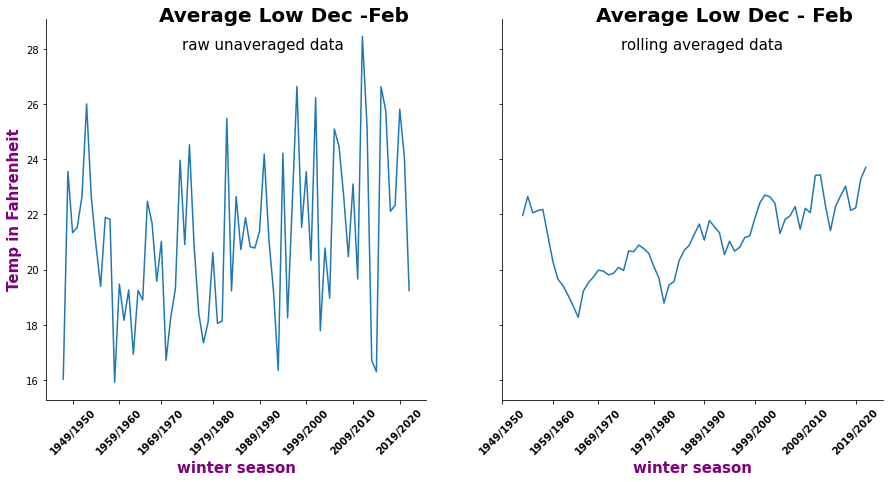

In [178]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(meeny.index, meeny)
ax[1].plot(meeny.index, meeny.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[0].set_yticks([28, 30, 32, 34, 36])
#ax[0].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Temp in Fahrenheit', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[1].set_yticks([28, 30, 32, 34, 36])
#ax[1].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=20.5, y=29, s='Average Low Dec -Feb',
        size=20, weight='bold')
ax[0].text(x=25.5, y=28, s='raw unaveraged data',
        size=15)
ax[1].text(x=20.5, y=29, s='Average Low Dec - Feb',
        size=20, weight='bold')
ax[1].text(x=25.5, y=28, s='rolling averaged data',
        size=15)
plt.show()

### The second (i.e. right) graph is averaged over preceding 7 years, and clearly shows an increase in temperatures  Furthermore, in the last few years of 2017 to 2021, it has increased dramatically compared to the first 60 years of the 71 year window.
### Now, I will focus on the number of nightly lows each season that dropped below a certain threshold. I opted for Zero Fahrenheit as it shows a cold night well below the norm

In [179]:
zippo = df3.groupby('season')['TMIN'].apply(lambda x: x[x < 0.0].count())
print(zippo)

season
1947/1948    9
1948/1949    0
1949/1950    2
1950/1951    5
1951/1952    1
            ..
2017/2018    3
2018/2019    4
2019/2020    0
2020/2021    0
2021/2022    7
Name: TMIN, Length: 75, dtype: int64


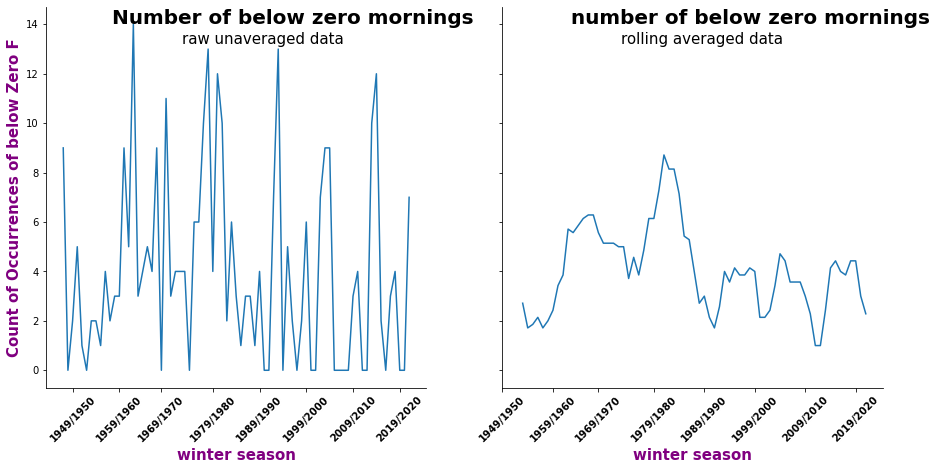

In [180]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(zippo.index, zippo)
ax[1].plot(zippo.index, zippo.rolling(7).mean())

ax[0].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[0].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[0].set_yticks([28, 30, 32, 34, 36])
#ax[0].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[0].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Count of Occurrences of below Zero F', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].set_xticks(['1949/1950', '1959/1960', '1968/1969', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'])
ax[1].set_xticklabels(['1949/1950', '1959/1960', '1969/1970', '1979/1980', '1989/1990', '1999/2000', '2009/2010', '2019/2020'], rotation = 45, weight = 'bold')
#ax[1].set_yticks([28, 30, 32, 34, 36])
#ax[1].set_yticklabels([28, 30, 32, 34, 36], weight = 'bold')
ax[1].set_xlabel ('winter season', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[0].text(x=10.5, y=14, s='Number of below zero mornings',
        size=20, weight='bold')
ax[0].text(x=25.5, y=13.2, s='raw unaveraged data',
        size=15)
ax[1].text(x=15.5, y=14, s='number of below zero mornings',
        size=20, weight='bold')
ax[1].text(x=25.5, y=13.2, s='rolling averaged data',
        size=15)
plt.show()

### A modest decrease of subzero lows have occurred over the 73 year window, but an enormous drop has not been experienced, suggesting that the overall increase in temperatures is attributed to something else

### Now I will see how the number of 90+ degree days per year has varied over the 73 year window

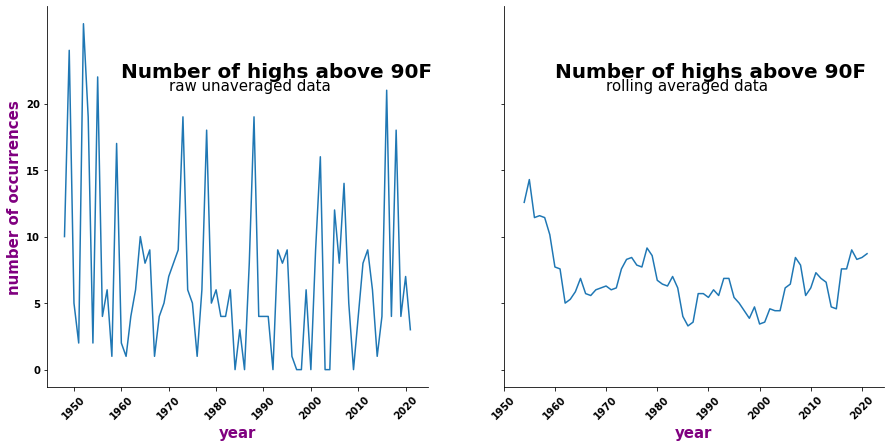

In [181]:
above90 = dffull.groupby('year')['TMAX'].apply(lambda x: x[x > 90.0].count())
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15, 7))
ax[0].plot(above90.index, above90)
ax[1].plot(above90.index, above90.rolling(7).mean())

ax[0].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[0].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[0].set_yticks([0, 5, 10, 15, 20])
ax[0].set_yticklabels([0, 5, 10, 15, 20], weight = 'bold')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (raw) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)



ax[1].set_xticks([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
ax[1].set_xticklabels([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], rotation = 45, weight = 'bold')
ax[1].set_yticks([0, 5, 10, 15, 20])
ax[1].set_yticklabels([0, 5, 10, 15, 20], weight = 'bold')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
#ax[1].set_ylabel ('number of occurrences', c = 'purple', size = 15, weight = 'bold')
#ax.set_title('Number of daily lows (rolling averaged) below 20F per winter season for DCA', c = 'green', size = 15, weight = 'bold')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].text(x=1960, y=22, s='Number of highs above 90F',
        size=20, weight='bold')
ax[0].text(x=1970, y=21, s='raw unaveraged data',
        size=15)
ax[1].text(x=1960, y=22, s='Number of highs above 90F',
        size=20, weight='bold')
ax[1].text(x=1970, y=21, s='rolling averaged data',
        size=15)

plt.show()

### Again, little change is observed in the number of 90+ degree days per calendar year over the 70+ year window

### Now I will compare how the average low temperatures for each of January and July have changed over the 73 year window

In [182]:
jandat = df2[df2['month'] == 1]
#print(janmin)
dfjanminmean = jandat.groupby(['year'])['TMIN'].mean()
print (dfjanminmean)

year
1948    11.193548
1949    23.548387
1950    24.483871
1951    20.064516
1952    20.032258
          ...    
2018    16.903226
2019    16.322581
2020    24.322581
2021    23.161290
2022    10.548387
Name: TMIN, Length: 75, dtype: float64


In [183]:
juldat = df2[df2['month'] == 7]
#print(janmin)
dfjulminmean = juldat.groupby(['year'])['TMIN'].mean()
#print (dfjulminmean)

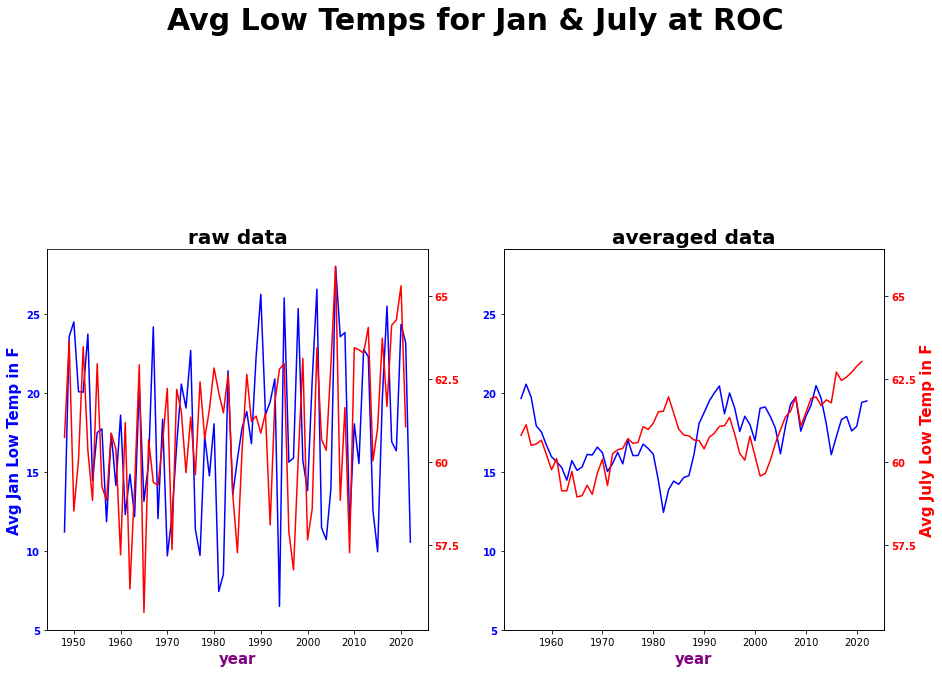

In [184]:

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].plot(dfjanminmean.index, dfjanminmean, color='blue')

# Create a twin Axes that shares the x-axis
ax2 = np.array([a.twinx() for a in ax.ravel()]).reshape(ax.shape)


# Plot the relative temperature in red
ax2[0].plot(dfjulminmean.index, dfjulminmean,color='red')
# Plot the CO2 variable in blue
ax[1].plot(dfjanminmean.index, dfjanminmean.rolling(7).mean(), color='blue')

ax[0].set_yticks([5, 10, 15, 20, 25])
ax[0].set_yticklabels([5, 10, 15, 20, 25], weight = 'bold', c = 'blue')
ax2[0].set_yticks([57.5, 60, 62.5, 65])
ax2[0].set_yticklabels([57.5, 60, 62.5, 65], weight = 'bold', c = 'red')
ax[0].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')
ax[0].set_ylabel ('Avg Jan Low Temp in F', c = 'blue', size = 15, weight = 'bold')
ax2[1].set_ylabel ('Avg July Low Temp in F', c = 'red', size = 15, weight = 'bold')

ax2[1].plot(dfjulminmean.index, dfjulminmean.rolling(7).mean(),color='red')
ax2[0].get_shared_y_axes().join(ax2[0], ax2[1])
ax[0].get_shared_y_axes().join(ax[0], ax[1])


ax[1].set_yticks([5, 10, 15, 20, 25])
ax[1].set_yticklabels([5, 10, 15, 20, 25], weight = 'bold', c = 'blue')
ax2[1].set_yticks([57.5, 60, 62.5, 65])
ax2[1].set_yticklabels([57.5, 60, 62.5, 65], weight = 'bold', c = 'red')
ax[1].set_xlabel ('year', c = 'purple', size = 15, weight = 'bold')

ax[0].spines['top'].set_visible(False)

ax[0].set_title("raw data", size=20, weight='bold')
ax[1].set_title("averaged data", size=20, weight='bold')

ax[0].text(x=1970, y=43, s='Avg Low Temps for Jan & July at ROC', size=30, weight='bold')


plt.show()

### It appears that the nightly lows in July have increased substantially over the 73 year window, while the nightly lows in January have little changed

### Now I will create a function to observe how the daily highs and lows for each month has varied over the 73 year window

year
1948    60.741935
1949    63.645161
1950    58.516129
1951    60.064516
1952    63.483871
          ...    
2017    61.677419
2018    64.129032
2019    64.290323
2020    65.322581
2021    61.064516
Name: TMIN, Length: 74, dtype: float64


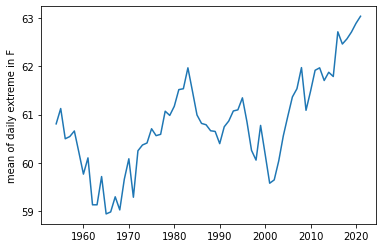

In [185]:
import matplotlib.pyplot as plt
import numpy as np
def plotmonthtemp (mon, col = 'TMIN'):
    mondat = df2[df2['month'] == mon]
    #print(janmin)
    dfmonext = mondat.groupby(['year'])[col].mean()
    print (dfmonext)
    fig, ax = plt.subplots()
    ax.plot(dfmonext.index, dfmonext.rolling(7).mean())
    ax.set_ylabel ('mean of daily extreme in F')
    plt.show()
plotmonthtemp(7, 'TMIN') 

### It appears that the greatest increases were observed for nightly lows in the June to October time frame which experienced outsied increases over the 73 year period.  

### my original theory that most of the increase in overall temperatures occurred by reduction in extreme cold winter nights turns out to be false, as it is the lows at night in the warmer months that had the greatest increase in temperatures over the 73 year window

### Also, most of the temperature rises were experienced in just the last 10 or 15 years of the 73 year window, suggesting that global warming is accelerating

